In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder = OneHotEncoder()
le = LabelEncoder()

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [4]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [5]:
df.shape

(383, 17)

In [6]:
df['Recurred'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df[df.duplicated()].shape

(19, 17)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(364, 17)

In [10]:
#yes = 1 and no = 0
df['Recurred'] = df['Recurred'].map({'Yes' : 1, 'No': 0}).astype('int64')

In [11]:
df['Recurred'].value_counts()

Recurred
0    256
1    108
Name: count, dtype: int64

In [12]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,0
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,0


In [13]:
df['Recurred'].unique()

array([0, 1], dtype=int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [15]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [16]:
df['Age'] = df['Age'].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    object
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [18]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [19]:
df['Focality'] = le.fit_transform(df['Focality']).astype('int64')

In [20]:
df['Focality'].value_counts()

Focality
1    228
0    136
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    object
 2   Smoking               364 non-null    object
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    int64 
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [22]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,Low,T1a,N0,M0,I,Indeterminate,0
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,0,Low,T1a,N0,M0,I,Excellent,0


In [23]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
df['Gender'] = df['Gender'].map({"F":0, 'M':1}).astype('int64')

In [25]:
df['Focality'].value_counts()

Focality
1    228
0    136
Name: count, dtype: int64

In [26]:
df['Smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
# Yes - 1 and No = 0
df['Smoking'] = df['Smoking'].map({'Yes':1, 'No':0}).astype('int64')

In [28]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,Low,T1a,N0,M0,I,Indeterminate,0
1,34,0,0,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
2,30,0,0,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
3,62,0,0,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
4,62,0,0,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,0,Low,T1a,N0,M0,I,Excellent,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    int64 
 2   Smoking               364 non-null    int64 
 3   Hx Smoking            364 non-null    object
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    int64 
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [30]:
df['Hx Smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
# Yes = 1 and No = 0
df['Hx Smoking'] = df['Hx Smoking'].map({'Yes':1, 'No':0}).astype('int64')

In [32]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,Low,T1a,N0,M0,I,Indeterminate,0
1,34,0,0,1,No,Euthyroid,Multinodular goiter,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
2,30,0,0,0,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
3,62,0,0,0,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
4,62,0,0,0,No,Euthyroid,Multinodular goiter,No,Micropapillary,0,Low,T1a,N0,M0,I,Excellent,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    int64 
 2   Smoking               364 non-null    int64 
 3   Hx Smoking            364 non-null    int64 
 4   Hx Radiothreapy       364 non-null    object
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    int64 
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [34]:
df['Hx Radiothreapy'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
# Yes = 1 and No = 0
df['Hx Radiothreapy'] = df['Hx Radiothreapy'].map({'Yes':1, 'No':0}).astype('int64')

In [36]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,Low,T1a,N0,M0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,Low,T1a,N0,M0,I,Excellent,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    int64 
 2   Smoking               364 non-null    int64 
 3   Hx Smoking            364 non-null    int64 
 4   Hx Radiothreapy       364 non-null    int64 
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    int64 
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


<Axes: xlabel='Age'>

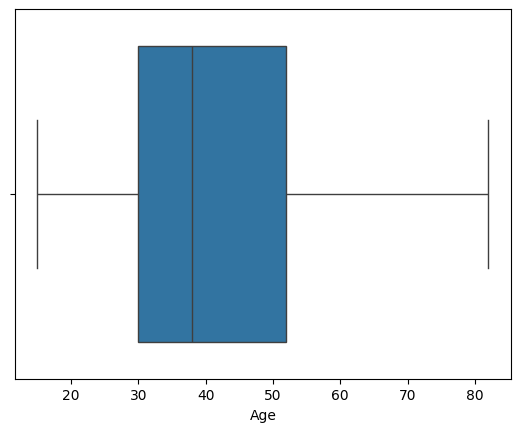

In [38]:
sn.boxplot(x=df['Age'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    int64 
 2   Smoking               364 non-null    int64 
 3   Hx Smoking            364 non-null    int64 
 4   Hx Radiothreapy       364 non-null    int64 
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    int64 
 10  Risk                  364 non-null    object
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [40]:
df['Risk'].unique() 

array(['Low', 'Intermediate', 'High'], dtype=object)

In [41]:
df['Risk'] = df['Risk'].map({'Low':0,'Intermediate':1, 'High':2}).astype('int64')

In [42]:
df['Risk'].value_counts()

Risk
0    230
1    102
2     32
Name: count, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    int64 
 2   Smoking               364 non-null    int64 
 3   Hx Smoking            364 non-null    int64 
 4   Hx Radiothreapy       364 non-null    int64 
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    int64 
 10  Risk                  364 non-null    int64 
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    object
 15  Response              364 non-null    object


In [44]:
df['Stage'].unique()    

array(['I', 'II', 'IVB', 'III', 'IVA'], dtype=object)

In [45]:
root_stage = {'I':1, 'II':2, 'III':3, 'IVA':4, 'IVB':5}

In [46]:
df['Stage'] = df['Stage'].map(root_stage).astype('int64')

In [47]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,0,T1a,N0,M0,1,Indeterminate,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,0,T1a,N0,M0,1,Excellent,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,0,T1a,N0,M0,1,Excellent,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,0,T1a,N0,M0,1,Excellent,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,0,T1a,N0,M0,1,Excellent,0


In [48]:
df['Stage'].unique()

array([1, 2, 5, 3, 4], dtype=int64)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    int64 
 2   Smoking               364 non-null    int64 
 3   Hx Smoking            364 non-null    int64 
 4   Hx Radiothreapy       364 non-null    int64 
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    int64 
 10  Risk                  364 non-null    int64 
 11  T                     364 non-null    object
 12  N                     364 non-null    object
 13  M                     364 non-null    object
 14  Stage                 364 non-null    int64 
 15  Response              364 non-null    object


In [50]:
df['Adenopathy'].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

In [51]:
df['Thyroid Function'].unique()

array(['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism'],
      dtype=object)

In [52]:
df['Pathology'].unique()

array(['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell'],
      dtype=object)

In [53]:
df['Response'].unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

In [54]:
df['Physical Examination'].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
      dtype=object)

In [55]:
df['T'].unique()

array(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], dtype=object)

In [56]:
df['T'] = df['T'].map({'T1a':1, 'T1b':2, 'T2':3, 'T3a':4, 'T3b':5, 'T4a':6, 'T4b':7}).astype('int64') 

In [57]:
df['T'].value_counts()

T
3    138
4     96
1     46
2     40
6     20
5     16
7      8
Name: count, dtype: int64

In [58]:
df['N'].unique()

array(['N0', 'N1b', 'N1a'], dtype=object)

In [59]:
df['N'] = df['N'].map({'N0':1, 'N1b':2, 'N1a':3}).astype('int64')   

In [60]:
df['N'].value_counts()

N
1    249
2     93
3     22
Name: count, dtype: int64

In [61]:
df['M'].unique()

array(['M0', 'M1'], dtype=object)

In [62]:
df['M'] = df['M'].map({'M0':1, 'M1':2}).astype('int64')

In [63]:
df['M'].value_counts()

M
1    346
2     18
Name: count, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   364 non-null    int64 
 1   Gender                364 non-null    int64 
 2   Smoking               364 non-null    int64 
 3   Hx Smoking            364 non-null    int64 
 4   Hx Radiothreapy       364 non-null    int64 
 5   Thyroid Function      364 non-null    object
 6   Physical Examination  364 non-null    object
 7   Adenopathy            364 non-null    object
 8   Pathology             364 non-null    object
 9   Focality              364 non-null    int64 
 10  Risk                  364 non-null    int64 
 11  T                     364 non-null    int64 
 12  N                     364 non-null    int64 
 13  M                     364 non-null    int64 
 14  Stage                 364 non-null    int64 
 15  Response              364 non-null    object


In [65]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,0,1,1,1,1,Indeterminate,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,0,1,1,1,1,Excellent,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,0,1,1,1,1,Excellent,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,0,1,1,1,1,Excellent,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,0,1,1,1,1,Excellent,0


In [66]:
end_arr = encoder.fit_transform(df[['Thyroid Function','Physical Examination','Adenopathy', 'Pathology', 'Response']]).toarray()
end_col_n = encoder.get_feature_names_out(['Thyroid Function','Physical Examination', 'Adenopathy', 'Pathology', 'Response'])
end_df = pd.DataFrame(end_arr, columns=end_col_n)
df = df.drop(['Thyroid Function','Physical Examination', 'Adenopathy', 'Pathology', 'Response'], axis=1).reset_index(drop=True)
df = pd.concat([df, end_df], axis=1)

In [67]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Focality,Risk,T,N,M,...,Adenopathy_Posterior,Adenopathy_Right,Pathology_Follicular,Pathology_Hurthel cell,Pathology_Micropapillary,Pathology_Papillary,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,0,0,0,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,34,0,0,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,30,0,0,0,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,62,0,0,0,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,62,0,0,0,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Age                                               364 non-null    int64  
 1   Gender                                            364 non-null    int64  
 2   Smoking                                           364 non-null    int64  
 3   Hx Smoking                                        364 non-null    int64  
 4   Hx Radiothreapy                                   364 non-null    int64  
 5   Focality                                          364 non-null    int64  
 6   Risk                                              364 non-null    int64  
 7   T                                                 364 non-null    int64  
 8   N                                                 364 non-null    int64  
 9   M                    

In [69]:
df.to_csv('Cleaned_dataset.csv', index=False)